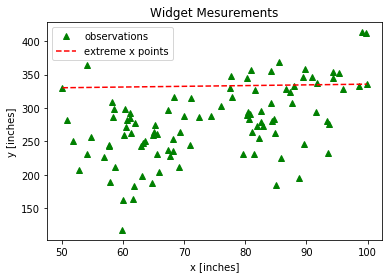

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('scatter_data.csv',comment='%',names=['x','y'])
#getting x and y column for x axis and y axis
x = df['x']
y = df['y']
# plot with green traingles
plt.plot(x, y, 'g^', label='observations')
# minimum  and maximum x cordinates at left and right
leftmin_x = min(x)
rightmax_x = max(x)

leftmin_y = y[x.idxmin()]
rightmax_y = y[x.idxmax()]
plt.plot([leftmin_x, rightmax_x], [leftmin_y, rightmax_y], 'r--', label='extreme x points')
plt.title('Widget Mesurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()
plt.show()

In [11]:
df2=pd.read_csv("student_grades.csv")

In [12]:
df2.head()

,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [45]:
a=df2[df2[' avgScore '] < 60]

In [44]:
a

,% studentID,avgScore
38,38,56.271864
53,53,49.716934
64,64,54.867957


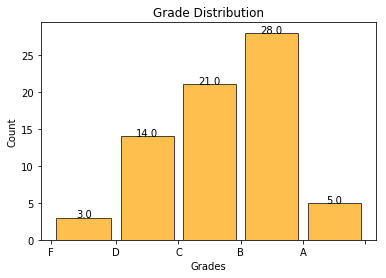

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file into a DataFrame
df2 = pd.read_csv("student_grades.csv")

# Define the grade score ranges and labels
# Specify the bin edges to align with grade midpoints
bins = [49.55,59.99, 69.99, 79.99, 89.99, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# Create the histogram using the actual column name from your DataFrame
hist_data, bin_edges, _ = plt.hist(df2[' avgScore '], bins=bins, edgecolor='k', alpha=0.7, rwidth=0.85, color='orange')

# Add labels and title
plt.xlabel('Grades')
plt.ylabel('Count')
plt.title('Grade Distribution')

# Add the grade labels to the x-axis
plt.xticks(bins, labels)

# Add counts above each bar
counts = [str(count) for count in hist_data]
for i in range(len(bins) - 1):
    plt.text((bin_edges[i] + bin_edges[i + 1]) / 2, hist_data[i], counts[i],ha='center')

# Display the plot
plt.show()


In [15]:
df4=pd.read_csv("solution_data.csv")

In [67]:
df4.head()

,% Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


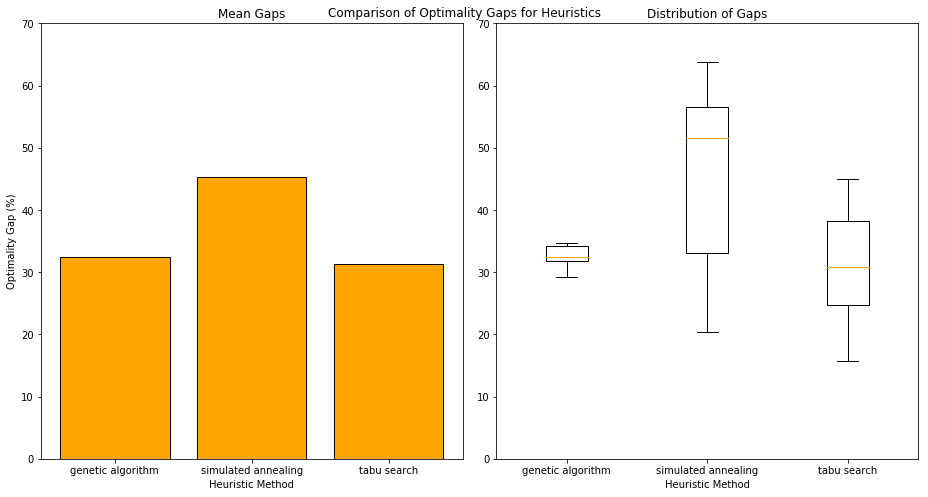

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data1= pd.read_csv('solution_data.csv',comment='%',names=['Problem','SolnMethod','Value'])
data1.columns = data1.columns.str.replace('%', '')
data1['SolnMethod'] = data1['SolnMethod'].str.strip('|')
data1['OptimalOFV'] = data1.groupby('Problem')['Value'].transform(lambda y: y.loc[data1['SolnMethod'] == 'optimal'].iloc[0])
data1['optimality_gap'] = (data1['OptimalOFV'] - data1['Value']) / data1['OptimalOFV'] * 100
filtr_data = data1[data1['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]

fig, axs = plt.subplots(1, 2, figsize=(13, 7))

axs[0].bar(filtr_data['SolnMethod'].unique(), filtr_data.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtr_data['optimality_gap'].max()) + 10, 10))

axs[1].boxplot([filtered_data[filtr_data['SolnMethod'] == method]['optimality_gap'] for method in filtr_data['SolnMethod'].unique()], labels=filtered_data['SolnMethod'].unique(), medianprops=dict(color='orange'))

axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtr_data['optimality_gap'].max()) + 10, 10))

ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()

C:\Users\ganeshahp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


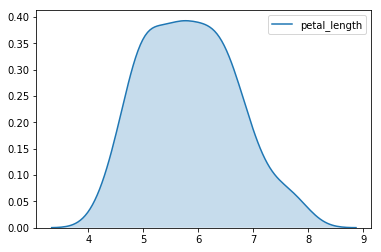

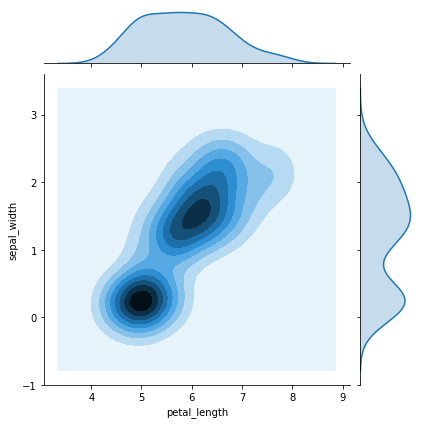

In [17]:
import seaborn as sns
import numpy as nm
iris_data = pd.read_csv('Iris.csv')
sns.kdeplot(data=iris_data['petal_length'], shade=True)
sns.jointplot(x=iris_data['petal_length'], y=iris_data['sepal_width'], kind="kde")

# data source kaggle 

In [83]:
iris_data.head()

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


                                 Interpretation of Graph 
The type of plot is a kernel density estimate (KDE) plot, you can think of it as a smoothed histogram which gives us the distribution of petal length with respect to sepal width. In the sample collected there is a data of petal length for various species the graph as described gives the normal distribution
On the other Hand two-dimensional (2D) KDE plot. The color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely